### Description

**Background and Context**

AllLife Bank is a US bank that has a growing customer base. The majority of these customers are liability customers (depositors) with varying sizes of deposits. The number of customers who are also borrowers (asset customers) is quite small, and the bank is interested in expanding this base rapidly to bring in more loan business and in the process, earn more through the interest on loans. In particular, the management wants to explore ways of converting its liability customers to personal loan customers (while retaining them as depositors).

A campaign that the bank ran last year for liability customers showed a healthy conversion rate of over 9% success. This has encouraged the retail marketing department to devise campaigns with better target marketing to increase the success ratio.

You as a Data scientist at AllLife bank have to build a model that will help the marketing department to identify the potential customers who have a higher probability of purchasing the loan.

**Objective**

To predict whether a liability customer will buy a personal loan or not.
Which variables are most significant.
Which segment of customers should be targeted more.


### Data Dictionary:
* ID: Customer ID
* Age: Customer’s age in completed years
* Experience: #years of professional experience
* Income: Annual income of the customer (in thousand dollars)
* ZIP Code: Home Address ZIP code.
* Family: the Family size of the customer
* CCAvg: Average spending on credit cards per month (in thousand dollars)
* Education: Education Level. 1: Undergrad; 2: Graduate;3: Advanced/Professional
* Mortgage: Value of house mortgage if any. (in thousand dollars)
* Personal_Loan: Did this customer accept the personal loan offered in the last campaign?
* Securities_Account: Does the customer have securities account with the bank?
* CD_Account: Does the customer have a certificate of deposit (CD) account with the bank?
* Online: Do customers use internet banking facilities?
* CreditCard: Does the customer use a credit card issued by any other Bank (excluding All life Bank)?



### Importing neccessary libraries

In [1]:
!pip install seaborn
!pip install scikit-learn

Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable


In [38]:
import numpy as np 
import pandas as pd
#for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

#display of all columns
pd.set_option('display.max_columns',None)

from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (accuracy_score,precision_score,
                             ConfusionMatrixDisplay,confusion_matrix,f1_score,r2_score,roc_auc_score,recall_score)

In [3]:
#reading the dataset
loan_data = pd.read_csv('Loan_Modelling.csv')

#creating a copy of the dataset
df = loan_data.copy()

In [4]:
#check the size of the dataset
df.shape

(5000, 14)

In [5]:
#check the for the data in the data set
df.head()

,ID,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [6]:
df.isnull().sum()

ID                    0
Age                   0
Experience            0
Income                0
ZIPCode               0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal_Loan         0
Securities_Account    0
CD_Account            0
Online                0
CreditCard            0
dtype: int64

In [7]:
df.duplicated().sum()

0

In [8]:
df.nunique()

ID                    5000
Age                     45
Experience              47
Income                 162
ZIPCode                467
Family                   4
CCAvg                  108
Education                3
Mortgage               347
Personal_Loan            2
Securities_Account       2
CD_Account               2
Online                   2
CreditCard               2
dtype: int64

In [15]:
df.columns

Index(['ID', 'Age', 'Experience', 'Income', 'ZIPCode', 'Family', 'CCAvg',
       'Education', 'Mortgage', 'Personal_Loan', 'Securities_Account',
       'CD_Account', 'Online', 'CreditCard'],
      dtype='object')

In [9]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,5000.0,2500.500000,1443.520003,1.0,1250.75,2500.5,3750.25,5000.0
Age,5000.0,45.338400,11.463166,23.0,35.00,45.0,55.00,67.0
Experience,5000.0,20.104600,11.467954,-3.0,10.00,20.0,30.00,43.0
Income,5000.0,73.774200,46.033729,8.0,39.00,64.0,98.00,224.0
ZIPCode,5000.0,93169.257000,1759.455086,90005.0,91911.00,93437.0,94608.00,96651.0
Family,5000.0,2.396400,1.147663,1.0,1.00,2.0,3.00,4.0
CCAvg,5000.0,1.937938,1.747659,0.0,0.70,1.5,2.50,10.0
Education,5000.0,1.881000,0.839869,1.0,1.00,2.0,3.00,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.00,0.0,101.00,635.0
Personal_Loan,5000.0,0.096000,0.294621,0.0,0.00,0.0,0.00,1.0


- The data set have 14 columns and 5000 rows
- The data set have no duplicated values and there null values in the data set

### Data Visualization

### Univarient variables

<AxesSubplot:xlabel='Age', ylabel='Count'>

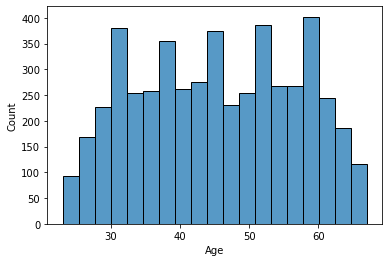

In [10]:
sns.histplot(df['Age'])

<AxesSubplot:xlabel='Experience', ylabel='Count'>

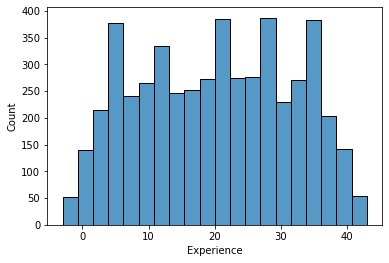

In [11]:
sns.histplot(df['Experience'])

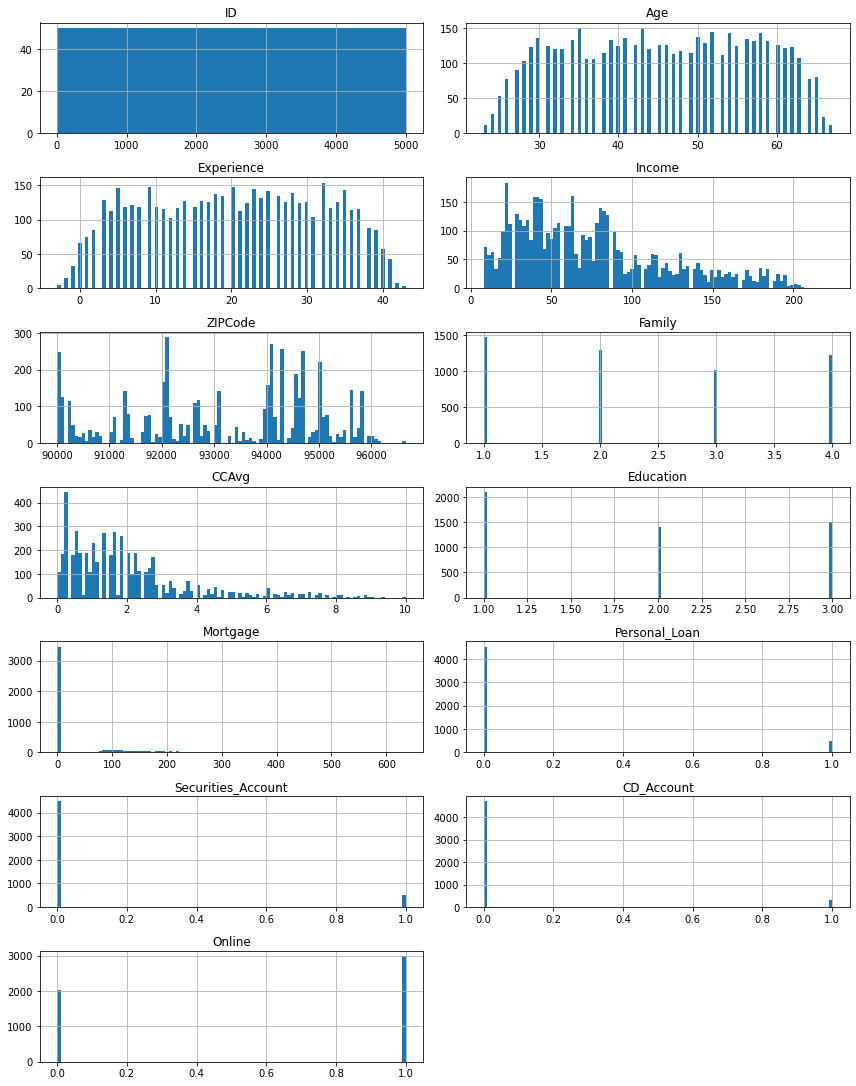

In [12]:
columns = list(df)[:-1]

df[columns].hist(stacked = False, bins = 100, figsize=(12,30), layout=(14,2));

plt.tight_layout()

<AxesSubplot:xlabel='Personal_Loan', ylabel='Income'>

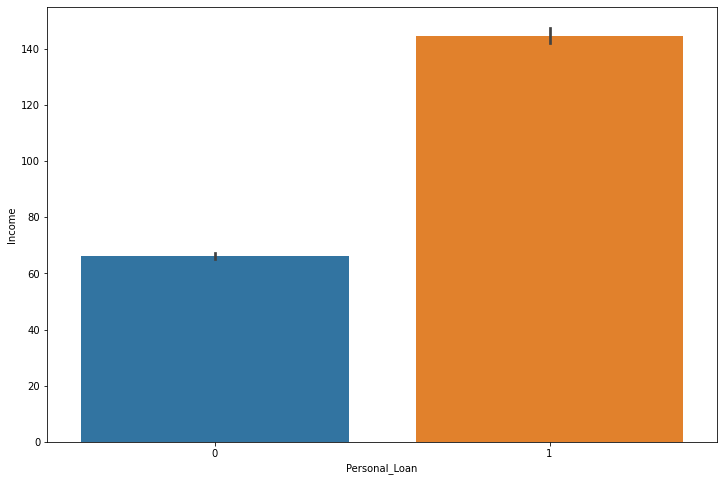

In [24]:
plt.figure(figsize=(12,8));
sns.barplot(df,x= 'Personal_Loan', y= 'Income')

<AxesSubplot:xlabel='Family', ylabel='Personal_Loan'>

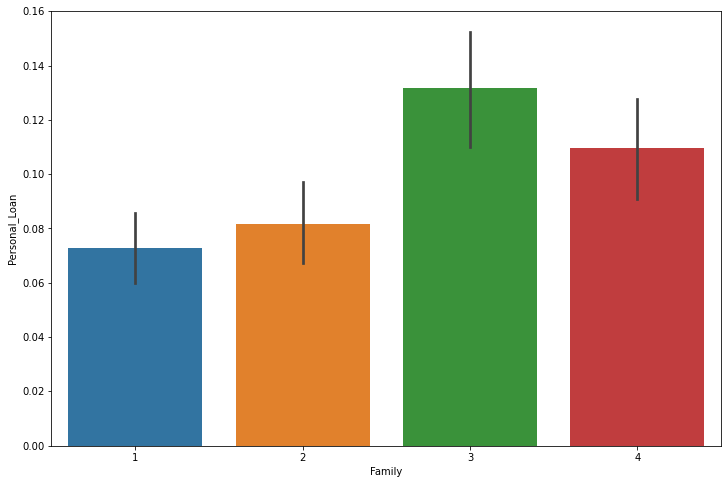

In [72]:
plt.figure(figsize=(12,8));
sns.barplot(df,x= 'Family', y= 'Personal_Loan')

<AxesSubplot:>

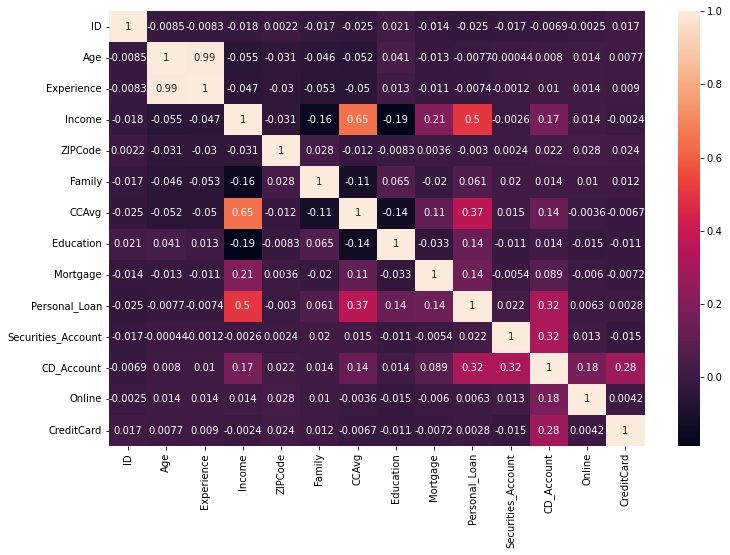

In [22]:
#plot correlation graph for the data set
plt.figure(figsize=(12,8));
sns.heatmap(df.corr(),annot=True)

**Observation**
- The population of customers earning above 80 use the personal loan are more than the population of customers earning less than 80. 
- The correlation tables shows that there i a higher correclation between the personl_loan and the income column that the other columns


## Selecting features

In [17]:
#selecting the features and target
X = df.drop('Personal_Loan',axis=1)
y = df['Personal_Loan']

## Spliting the data set

In [19]:
#check for count of true 
df['Personal_Loan'].value_counts(normalize=True)

0    0.904
1    0.096
Name: Personal_Loan, dtype: float64

In [29]:
#import library for splitting the data
from sklearn.model_selection import train_test_split
# splitting the dataset into test,train and val 
x_train_val,x_test,y_train_val, y_test = train_test_split(X,y,random_state=1,stratify=y,test_size=0.2)
x_train,x_val,y_train,y_val = train_test_split(x_train_val,y_train_val,random_state=1,stratify=y_train_val, test_size=0.2)

In [26]:
#check the distribution of target in train data
y_test.value_counts(normalize=True)

0    0.904
1    0.096
Name: Personal_Loan, dtype: float64

In [27]:
#check the distribution of target in train data
y_val.value_counts(normalize=True)

0    0.90375
1    0.09625
Name: Personal_Loan, dtype: float64

### Logistic Regression

In [30]:
#importing library for normalization
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
#declare instance of the scale
scaler = StandardScaler()
x_train_sc = scaler.fit_transform(x_train)
x_test_sc = scaler.transform(x_test)
x_val_sc = scaler.transform(x_val)

In [31]:
#importing library for logistic regression
from sklearn.linear_model import LogisticRegression

#declare instance of logistic regression
log_reg = LogisticRegression(random_state=0)


#fitting the trained model and the target
log_reg.fit(x_train_sc,y_train)

LogisticRegression(random_state=0)

In [32]:
#check for the performance of the model
print('Train Performance:{:.3f}'.format(log_reg.score(x_train_sc,y_train)))
print('Test Performance:{:.3f}'.format(log_reg.score(x_test_sc,y_test)))
print('Validation Performance:{:.3f}'.format(log_reg.score(x_val_sc,y_val)))

Train Performance:0.952
Test Performance:0.944
Validation Performance:0.960


**Observation**
- The logistic Regression will predict correctly the number of customer that bought the personal loan 95% on the training dataset.
- The logistic Regression will predict correctly the number of customer that bought the personal loan 94% on the test dataset.
- The logistic Regression will predict correctly the number of customer that bought the personal loan 96% on the validation dataset.

## Training pipelines

In [34]:
#functions to train a model and compute train accuracy
def train(model,X,y):
    """
    Function to train a model and compute accuracy
    model:Model algorithm not yet trained
    X:train features
    y:train target    
    """
    train_model = model.fit(X,y)  #training the model
    preds = train_model.predict(X)  #making predictions
    acc = accuracy_score(y,preds)   # computing  the accuracy
    print (f"Train Accuracy:{acc}")
    return train_model


In [35]:

#function to evalate the model and complete metrics on test data
def evaluate(model,X,y,threshold=0.5):
    """
    Funtion to evaluate train model with different metrics
    
    model:trained model(classifier)
    X:validation features
    y :target in validation
    
    threshold:the value to filter the prediction
    """
    pred_proba = model.predict_proba(X)[:,1]
    pred_class = np.round(pred_proba>threshold) # convert 0 or 1
    acc = accuracy_score(y,pred_class)
    recall = recall_score(y,pred_class)
    precision = precision_score(y,pred_class)
    f1 = f1_score(y,pred_class)
    
    #create dataframe for matrics
    df = pd.DataFrame({
        "Accuracy":acc,
        "Recall":recall,
        "Precision":precision,
        "F1":f1},index = [0])
    
    #compute confusion matrix
    conf = confusion_matrix (y,pred_class,labels = [0,1])     #labels indicate that there zero and 1 in the label
    disp = ConfusionMatrixDisplay(conf, display_labels = [0,1])  #create plot of the confusion matrix
    disp.plot()
    plt.show()
    return df

In [36]:
#training the test data set
log_reg_model = train(log_reg,x_train_sc,y_train)

Train Accuracy:0.9521875


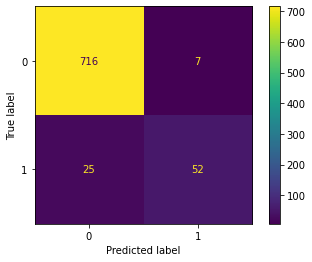

,Accuracy,Recall,Precision,F1
0,0.96,0.675325,0.881356,0.764706


In [42]:
#evaluating the validation  data set
val = evaluate(log_reg_model,x_val_sc,y_val)
val

**Observation**
- The above graph shows that model predicted 52 out of 59 customers who bought the personal loan correctly
-  The model got 25 wrongly of 77  to have bought the personal loan 
- The model predicted 7 wrongly of 59.

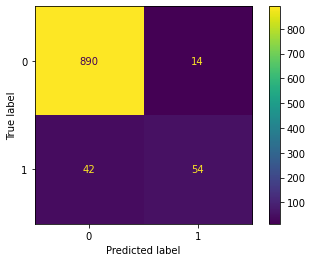

,Accuracy,Recall,Precision,F1
0,0.944,0.5625,0.794118,0.658537


In [39]:
#evaluating the test data set
test = evaluate(log_reg_model,x_test_sc,y_test)
test

### Model Improvement - Data

In [46]:
!pip install imblearn

Defaulting to user installation because normal site-packages is not writeable


In [47]:
from imblearn.over_sampling import ADASYN,SMOTE,RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler

In [48]:
#defining function for balancing the training the data
def balance_data(X,y, smote_type):
    
    """
    X:Train features
    y: tarin target
    smote_type: Kind of imbalance strategy
    """
    X_res, y_res = smote_type.fit_resample(X,y)
    return X_res,y_res

In [49]:
#create instance of models 
under = RandomUnderSampler(random_state=0)
adasyn = ADASYN(random_state=0)

#appying function on all declares instances
x_train_un, y_train_un =balance_data(x_train_sc,y_train,under)
x_train_ada, y_train_ada =balance_data(x_train_sc,y_train,adasyn)

Train Accuracy:0.9087947882736156


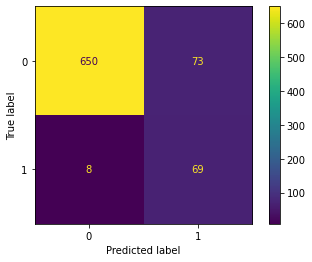

,Accuracy,Recall,Precision,F1
0,0.89875,0.896104,0.485915,0.630137


In [50]:
#rebuilding the model
log_reg_un = train(log_reg,x_train_un,y_train_un)    #training the model
#evaluating the model
df_un = evaluate(log_reg_un,x_val_sc,y_val)
df_un 


Train Accuracy:0.9087947882736156


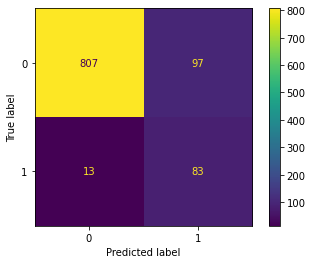

,Accuracy,Recall,Precision,F1
0,0.89,0.864583,0.461111,0.601449


In [51]:
#rebuilding the model
log_reg_un = train(log_reg,x_train_un,y_train_un)    #training the model
#evaluating the model
df_un = evaluate(log_reg_un,x_test_sc,y_test)
df_un 


Train Accuracy:0.884022849229704


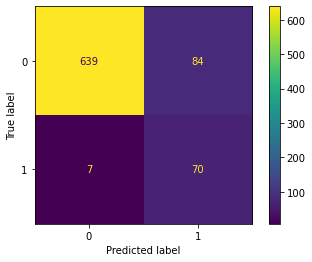

,Accuracy,Recall,Precision,F1
0,0.88625,0.909091,0.454545,0.606061


In [54]:
#rebuilding the model using adasyn

log_reg_ada = train(log_reg,x_train_ada,y_train_ada)    #training the model
#evaluating the model
df_ada = evaluate(log_reg_ada,x_val_sc,y_val)
df_ada

Train Accuracy:0.884022849229704


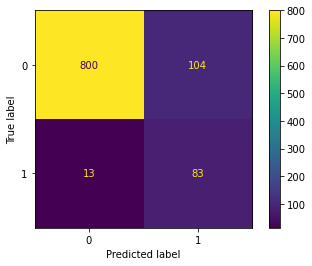

,Accuracy,Recall,Precision,F1
0,0.883,0.864583,0.44385,0.586572


In [55]:
#rebuilding the model using smote

log_reg_ada = train(log_reg,x_train_ada,y_train_ada)    #training the model
#evaluating the model
df_ada = evaluate(log_reg_ada,x_test_sc,y_test)
df_ada

## Model Improvement using Decision Tree

In [56]:
#importing neccessary library
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

In [57]:
#instance of the tree
dtree = DecisionTreeClassifier(random_state=0)

In [58]:
#train the model
dtree_model = train(dtree,x_train,y_train)

Train Accuracy:1.0


**The model accuracy is 100% which is over fitting the data set**

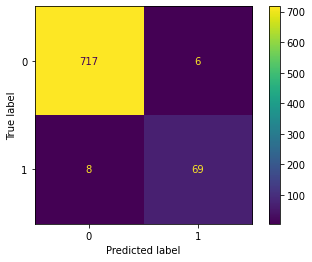

,Accuracy,Recall,Precision,F1
0,0.9825,0.896104,0.92,0.907895


In [59]:
#evaluate the model
dtree_df = evaluate(dtree,x_val,y_val)
dtree_df

- The model predicted 69 customer to have bought the loan correctly and 6 were predicted wrongly out of 75.(Recall)
- Out of 77 customers in the data the model wrongly classify 8  to have bought the personal loan.(Precision)

## Visualization of the Decision Tree

In [60]:
#get the features names
feat_name = list(X.columns)
def plot_decision_tree(dec_tree):
    plt.figure(figsize=(20,30))
    tree.plot_tree(dec_tree,feature_names=feat_name,class_names=True,filled=True,node_ids=True,fontsize=9)
    plt.show()

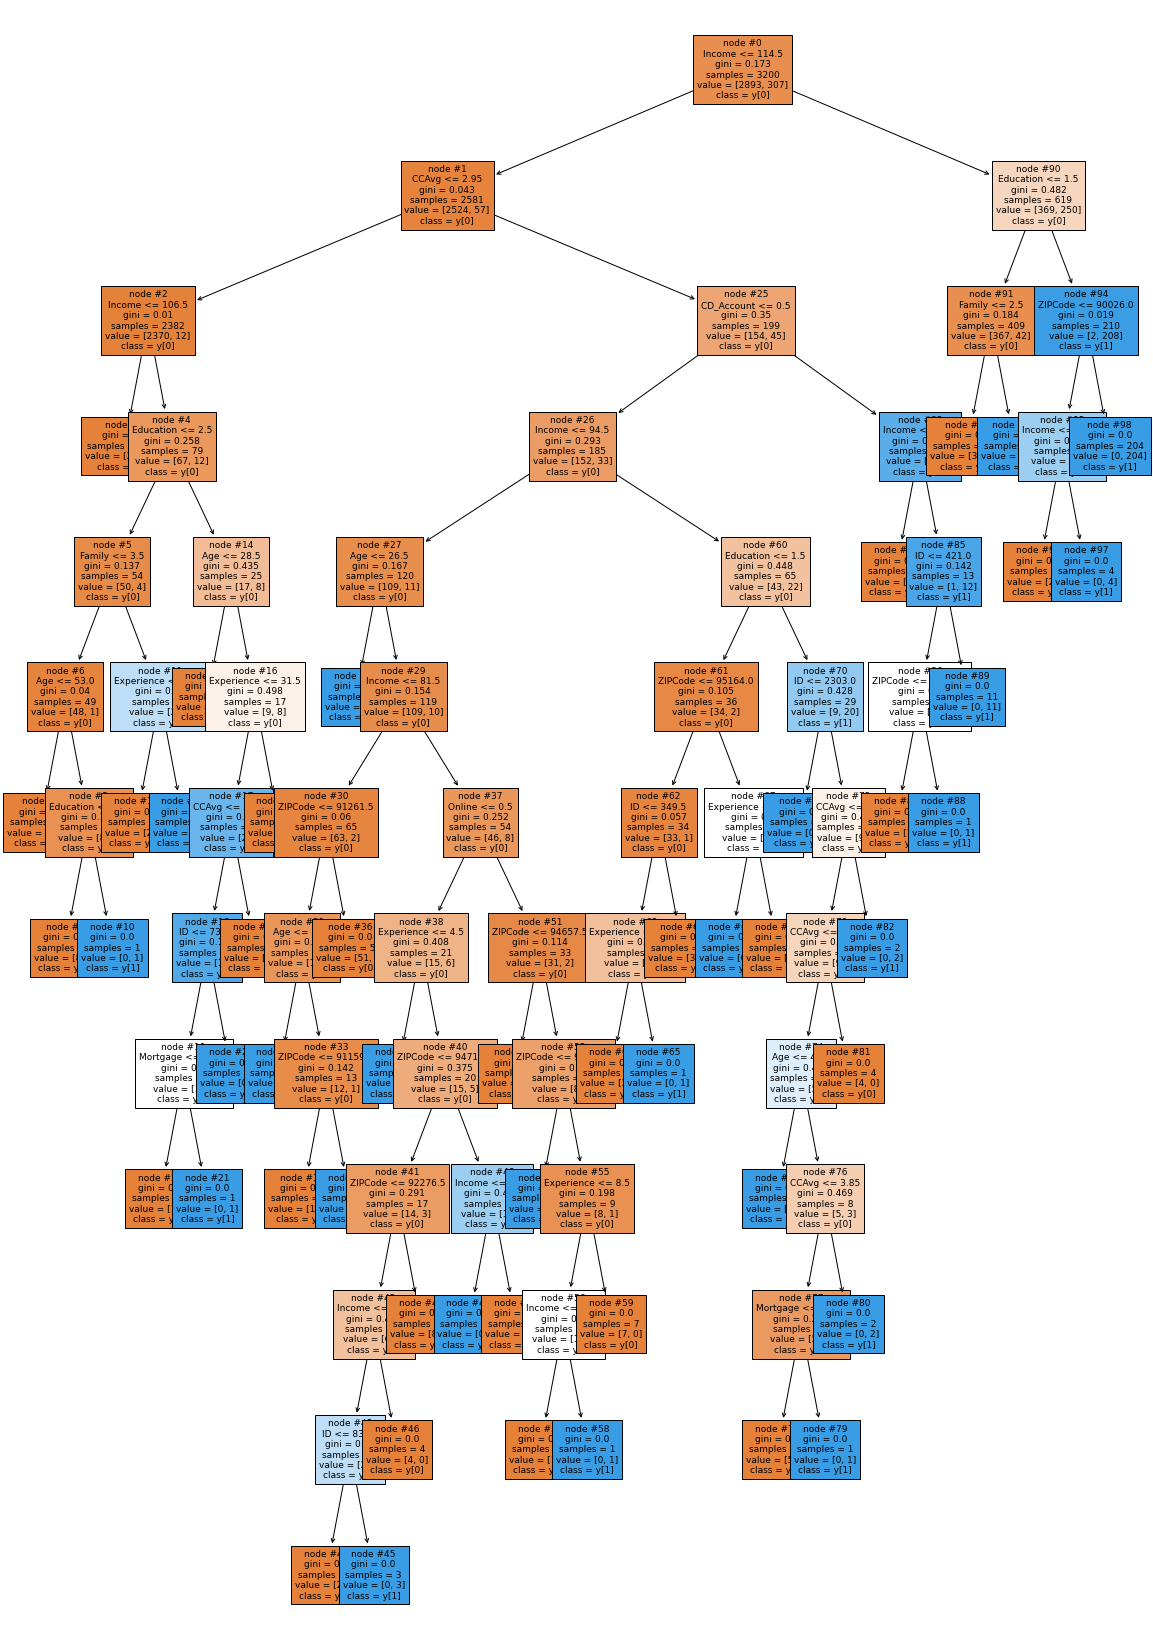

In [61]:
plot_decision_tree(dtree_model)

### Model Improvement using class weight  with pre_runing decision tree

In [65]:
dtree2 = DecisionTreeClassifier(random_state=1,class_weight={0:0.1,1:0.9},max_depth=4)

#calling the model
dtree2_model = train(dtree2,x_train,y_train)

Train Accuracy:0.9596875


- The accuracy of the train model accuracy have reduced by 5%  after improving the model

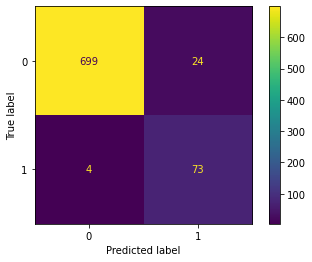

,Accuracy,Recall,Precision,F1
0,0.965,0.948052,0.752577,0.83908


In [66]:
#evaluating the model 
dtree2_df = evaluate(dtree2_model,x_val,y_val)
dtree2_df

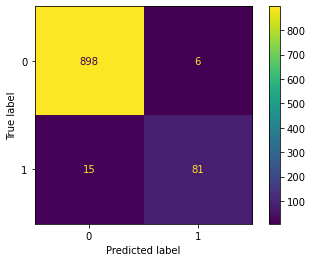

,Accuracy,Recall,Precision,F1
0,0.979,0.84375,0.931034,0.885246


In [67]:
#increasing the treshold to improve precision
test= evaluate(dtree2_model,x_test,y_test,threshold=0.9)
test


### Feature Importance

In [69]:
#getting the important features
importance = dtree2_model.feature_importances_
def plot_importance(importances):
    #gettin the index of the importance
    indices = np.argsort(importance)
    plt.figure(figsize=(12,12))
    plt.title("Features Importance")
    #creating horizontal bar plot
    plt.barh(range(len(indices)),importance[indices],color= "red",align="center")
    #setting ticks
    plt.yticks(range(len(indices)),[feat_name[i]for i in indices])
    plt.xlabel("Relative Importance")

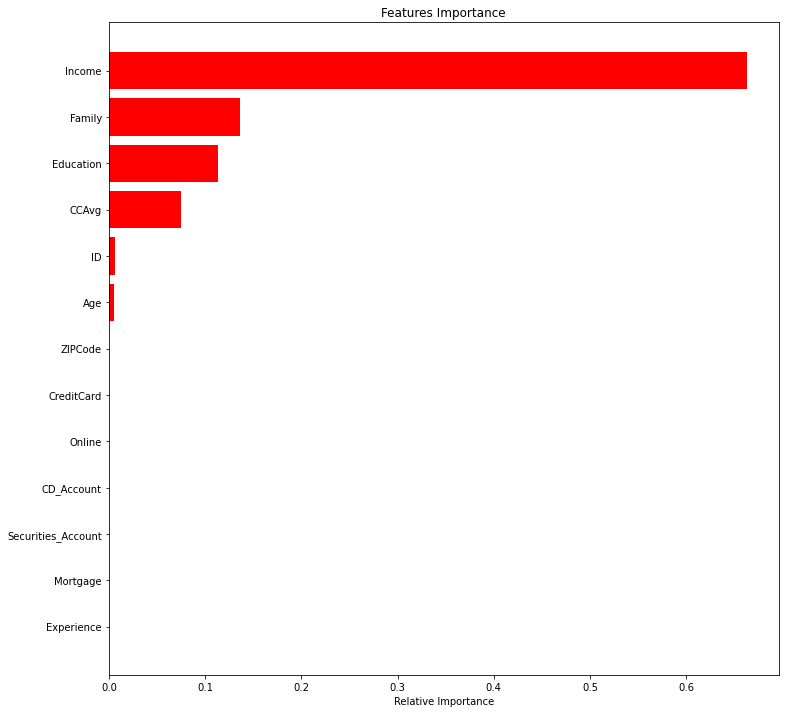

In [70]:
plot_importance(importance)

**Observation**
- Income,family, Education, ccavg are the most important features that can contribute to a customer buying a personal loan.
- The other features like Exxprience, mortage,credit card, cd_account have no impact in determing if a customer will buy a personal or not.

- The size of family of a customer tends to influence the decision of the customer in buying the personal loan.
- The Income of a customer tends to influence the decision to buy the personal loan.
### segment of customers should be targeted more.
The customer with large family size,customers with high income, customer with education background.